# Model fitting

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
import jetset
from jetset.test_data_helper import  test_SEDs
from jetset.data_loader import ObsData,Data
from jetset.plot_sedfit import PlotSED
from jetset.test_data_helper import  test_SEDs


In [2]:
test_SEDs

['/Users/orion/anaconda3/envs/develop/lib/python3.7/site-packages/jetset-1.1.0a3-py3.7-macosx-10.7-x86_64.egg/jetset/test_data/SEDs_data/SED_3C345.ecsv',
 '/Users/orion/anaconda3/envs/develop/lib/python3.7/site-packages/jetset-1.1.0a3-py3.7-macosx-10.7-x86_64.egg/jetset/test_data/SEDs_data/SED_MW_Mrk421.ecsv',
 '/Users/orion/anaconda3/envs/develop/lib/python3.7/site-packages/jetset-1.1.0a3-py3.7-macosx-10.7-x86_64.egg/jetset/test_data/SEDs_data/SED_MW_Mrk501.ecsv']

## loading data



In [3]:
print(test_SEDs[1])
data=Data.from_file(test_SEDs[1])


/Users/orion/anaconda3/envs/develop/lib/python3.7/site-packages/jetset-1.1.0a3-py3.7-macosx-10.7-x86_64.egg/jetset/test_data/SEDs_data/SED_MW_Mrk421.ecsv



***  binning data  ***
---> N bins= 89
---> bin_widht= 0.2



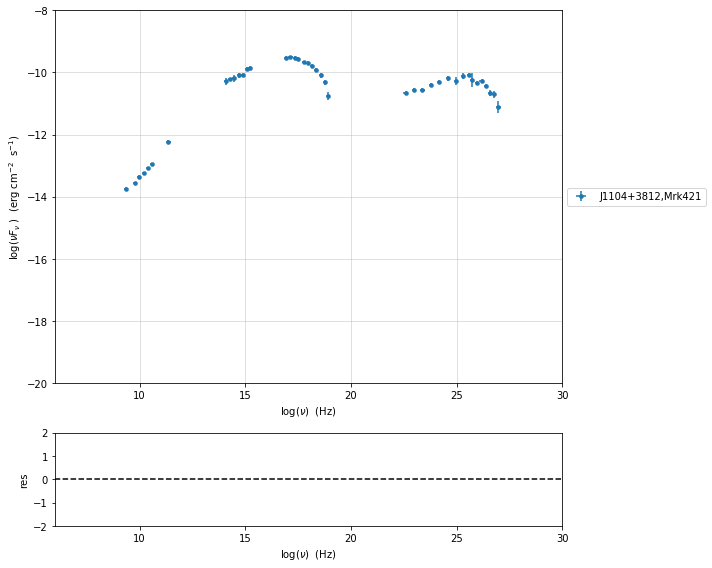

In [4]:
%matplotlib inline
sed_data=ObsData(data_table=data)
sed_data.group_data(bin_width=0.2)

sed_data.add_systematics(0.1,[10.**6,10.**29])
p=sed_data.plot_sed()

## phenomenological model constraining

### spectral indices


*** evaluating spectral indices for data ***
---> initial range for index radio  set to [6.000000,10.000000]
---> range for index radio updated  to [6.000000,10.000000]
---> name = radio            range=[6.000 ,10.000] log(Hz)  photon.val=-1.426527e+00, err=1.242337e-01 

---> initial range for index radio_mm  set to [10.000000,11.000000]
---> range for index radio_mm updated  to [10.000000,11.000000]
---> name = radio_mm         range=[10.000,11.000] log(Hz)  photon.val=-1.290348e+00, err=3.549105e-02 

---> initial range for index mm_IR  set to [11.000000,13.000000]
---> range for index mm_IR updated  to [10.300000,13.700000]
---> name = mm_IR            range=[10.300,13.700] log(Hz)  photon.val=-1.113008e+00, err=5.915490e-02 

---> initial range for index IR_Opt  set to [13.000000,14.000000]
---> range for index IR_Opt updated  to [12.500000,14.500000]
---> name = IR_Opt           range=[12.500,14.500] log(Hz)  photon.val=-1.783218e+00, err=9.834847e-02 

---> initial range for i

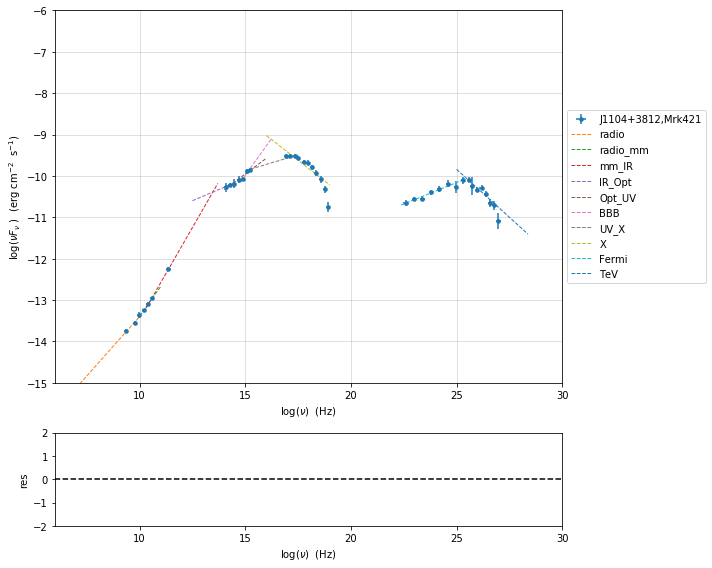

In [5]:
from jetset.sed_shaper import  SEDShape
my_shape=SEDShape(sed_data)
my_shape.eval_indices(silent=True)
p=my_shape.plot_indices()
p.rescale(y_min=-15,y_max=-6)

### sed shaper

In [6]:
mm,best_fit=my_shape.sync_fit(check_host_gal_template=False,
                  Ep_start=None,
                  minimizer='lsb',
                  silent=True,
                  fit_range=[10,21])


*** Log-Polynomial fitting of the synchrotron component ***
---> first blind fit run,  fit range: [10, 21]
name   par type       units      val  phys. bound. min phys. bound. max  log  frozen
---- ------------ ------------- ----- ---------------- ---------------- ----- ------
   b    curvature                -1.0            -10.0              0.0 False  False
   c third-degree                -1.0            -10.0             10.0 False  False
  Ep    peak freq            Hz  14.0              0.0             30.0  True  False
  Sp    peak flux erg / (cm2 s) -10.0            -30.0              0.0  True  False
---> class:  HSP

name   par type       units              val          phys. bound. min phys. bound. max  log  frozen
---- ------------ ------------- --------------------- ---------------- ---------------- ----- ------
   b    curvature                -0.15453004839441498            -10.0              0.0 False  False
   c third-degree               -0.010232447712917647        

In [7]:
best_fit.show_report()


**************************************************************************************************
Fit report

Model: sync-shape-fit
name   par type       units              val          phys. bound. min phys. bound. max  log  frozen
---- ------------ ------------- --------------------- ---------------- ---------------- ----- ------
   b    curvature                -0.15453004839441498            -10.0              0.0 False  False
   c third-degree               -0.010232447712917647            -10.0             10.0 False  False
  Ep    peak freq            Hz    16.722672085915843              0.0             30.0  True  False
  Sp    peak flux erg / (cm2 s)    -9.491658506170065            -30.0              0.0  True  False

converged=True
calls=28
Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000
dof=18
chisq=28.486970, chisq/red=1.582609 null hypothesis sig=0.055021

best fit pars
name      bestfit val              err +         err -   


*** Log-Polynomial fitting of the IC component ***
---> fit range: [23, 29]
---> LogCubic fit

**************************************************************************************************
Fit report

Model: IC-shape-fit
name   par type       units             val          phys. bound. min phys. bound. max  log  frozen
---- ------------ ------------- -------------------- ---------------- ---------------- ----- ------
   b    curvature               -0.20979248257934202            -10.0              0.0 False  False
   c third-degree               -0.04662648109652068            -10.0             10.0 False  False
  Ep    peak freq            Hz   25.249320432055992              0.0             30.0  True  False
  Sp    peak flux erg / (cm2 s)  -10.110940957544976            -30.0              0.0  True  False

converged=True
calls=202
------------------------------------------------------------------
| FCN = 5.911                   |     Ncalls=201 (201 total)     |
| EDM = 5.56E

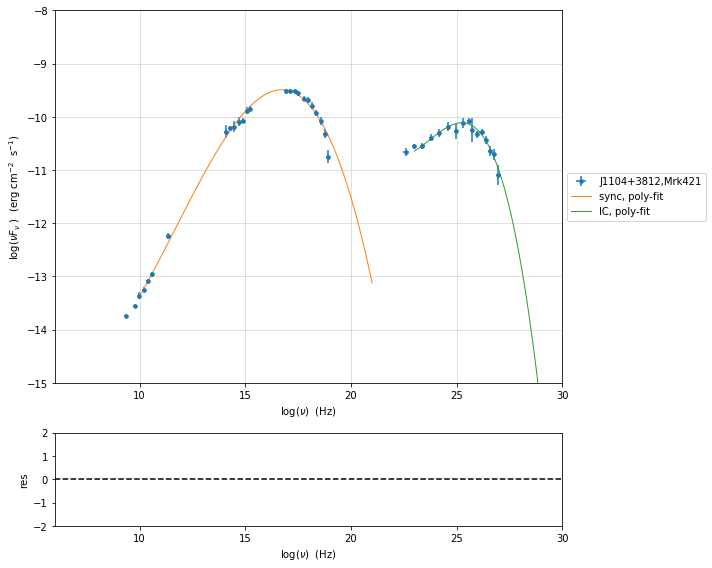

In [8]:
my_shape.IC_fit(fit_range=[23,29],minimizer='minuit')
p=my_shape.plot_shape_fit()
p.rescale(y_min=-15)

### model constraining

In [9]:
from jetset.obs_constrain import ObsConstrain
from jetset.model_manager import  FitModel
from jetset.minimizer import fit_SED
sed_obspar=ObsConstrain(beaming=25,
                        B_range=[0.001,0.1],
                        distr_e='lppl',
                        t_var_sec=3*86400,
                        nu_cut_IR=1E12,
                        SEDShape=my_shape)


prefit_jet=sed_obspar.constrain_SSC_model(electron_distribution_log_values=False)
prefit_jet.save_model('prefit_jet.dat')


***  constrains parameters from observable ***

      name             par type           units             val         phys. bound. min  phys. bound. max   log  frozen
---------------- ------------------- --------------- ------------------ ---------------- ------------------ ----- ------
               N    electron_density         1 / cm3              100.0              0.0               None False  False
            gmin  low-energy-cut-off lorentz-factor*                2.0              1.0       1000000000.0 False  False
            gmax high-energy-cut-off lorentz-factor*          1000000.0              1.0 1000000000000000.0 False  False
               s   LE_spectral_slope                                2.0            -10.0               10.0 False  False
               r  spectral_curvature                                0.4            -15.0               15.0 False  False
gamma0_log_parab    turn-over-energy lorentz-factor*            10000.0              1.0       100000000

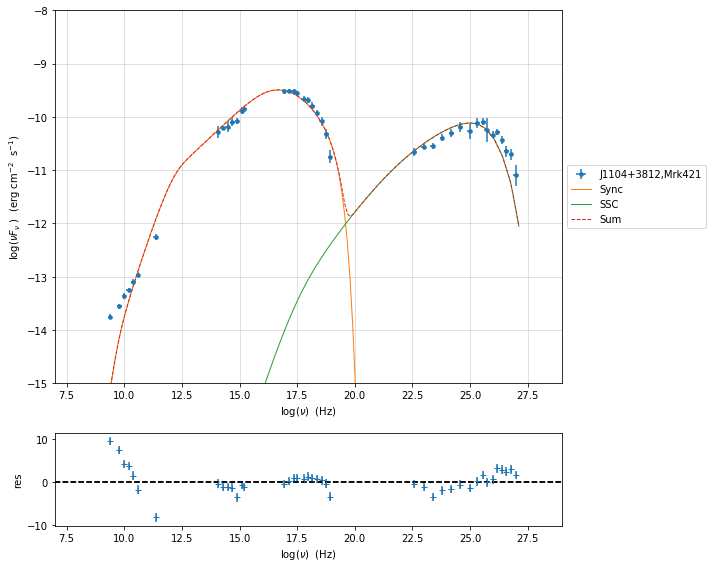

In [10]:
pl=prefit_jet.plot_model(sed_data=sed_data)
pl.add_residual_plot(prefit_jet,sed_data)
pl.rescale(y_min=-15,x_min=7,x_max=29)

## Model fitting

### Model fitting with LSB

In [11]:
from jetset.model_manager import  FitModel
from jetset.jet_model import Jet

jet_lsb=Jet.load_model('prefit_jet.dat')
jet_lsb.set_gamma_grid_size(200)

fit_model_lsb=FitModel( jet=jet_lsb, name='SSC-best-fit-lsb',template=None) 
fit_model_lsb.freeze('z_cosm')
fit_model_lsb.freeze('R_H')
fit_model_lsb.parameters.R.fit_range=[10**15.5,10**17.5]
fit_model_lsb.parameters.beam_obj.fit_range=[5,50]

model_minimizer_lsb,best_fit_lsb=fit_SED(fit_model_lsb,sed_data,10.0**11,10**29.0,fitname='SSC-best-fit-lsb',minimizer='lsb')


      name             par type           units               val          phys. bound. min  phys. bound. max   log  frozen
---------------- ------------------- --------------- --------------------- ---------------- ------------------ ----- ------
               R         region_size              cm 1.649187684856415e+16              0.0              1e+30 False  False
             R_H     region_position              cm                 1e+17              0.0               None False   True
               B      magnetic_field               G                   0.1              0.0               None False  False
        beam_obj             beaming Lorentz-factor*                  25.0           0.0001               None False  False
          z_cosm            redshift                                0.0308              0.0               None False  False
               N    electron_density         1 / cm3     3.072163777115778              0.0               None False  False
        

In [12]:
best_fit_lsb.save_report()
best_fit_lsb.bestfit_table

name,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
str16,object,object,object,float64,float64,object,bool
R,1.6642929916477756e+16,2.7270654501155972e+16,None,1.649187684856415e+16,3162277660168379.5,3.1622776601683795e+17,False
R_H,None,None,None,1e+17,0.0,None,True
B,0.06501987655354347,0.03891038733488095,None,0.1,0.0,None,False
beam_obj,28.536784397612355,19.136265066937863,None,25.0,5.0,50,False
z_cosm,None,None,None,0.0308,0.0,None,True
N,2.5165097279650115,3.9332637069110143,None,3.072163777115778,0.0,None,False
gmin,334.3352783238633,13.325849906281588,None,333.82306366971983,1.0,1000000000.0,False
gmax,909650.3003291064,675879.8536214805,None,975813.3512932507,1.0,1000000000000000.0,False
s,2.1417963813836582,0.15543014304830927,None,2.1815775138311513,-10.0,10.0,False


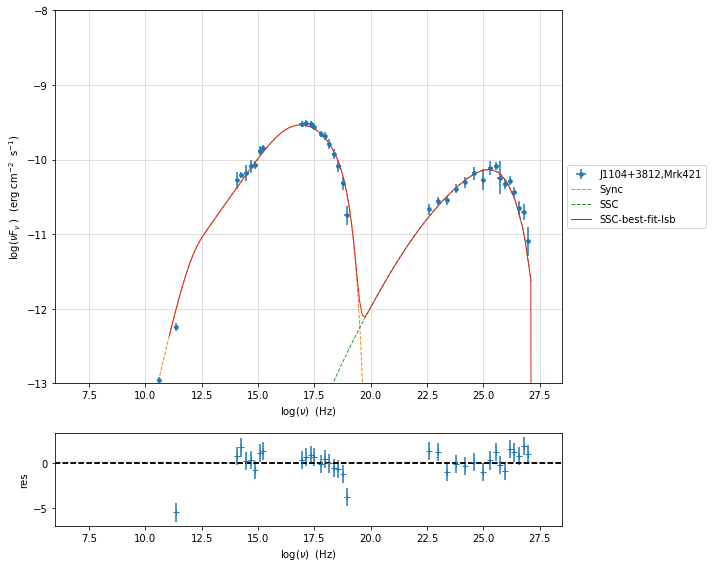

In [13]:
%matplotlib inline
fit_model_lsb.set_nu_grid(1E6,1E30,200)
fit_model_lsb.eval()
p2=fit_model_lsb.plot_model(sed_data=sed_data)
p2.rescale(y_min=-13,x_min=6,x_max=28.5)

### Model fitting with Minuit

In [14]:
jet_minuit=Jet.load_model('prefit_jet.dat')
jet_minuit.set_gamma_grid_size(200)

fit_model_minuit=FitModel( jet=jet_minuit, name='SSC-best-fit-minuit',template=None) 
fit_model_minuit.freeze('z_cosm')
fit_model_minuit.freeze('R_H')
fit_model_minuit.parameters.R.fit_range=[10**15.5,10**17.5]
fit_model_minuit.parameters.beam_obj.fit_range=[5,50]

model_minimizer_minuit,best_fit_minuit=fit_SED(fit_model_minuit,sed_data,10.0**11,10**29.0,fitname='SSC-best-fit-minuit',minimizer='minuit',max_ev=None)

      name             par type           units               val          phys. bound. min  phys. bound. max   log  frozen
---------------- ------------------- --------------- --------------------- ---------------- ------------------ ----- ------
               R         region_size              cm 1.649187684856415e+16              0.0              1e+30 False  False
             R_H     region_position              cm                 1e+17              0.0               None False   True
               B      magnetic_field               G                   0.1              0.0               None False  False
        beam_obj             beaming Lorentz-factor*                  25.0           0.0001               None False  False
          z_cosm            redshift                                0.0308              0.0               None False  False
               N    electron_density         1 / cm3     3.072163777115778              0.0               None False  False
        

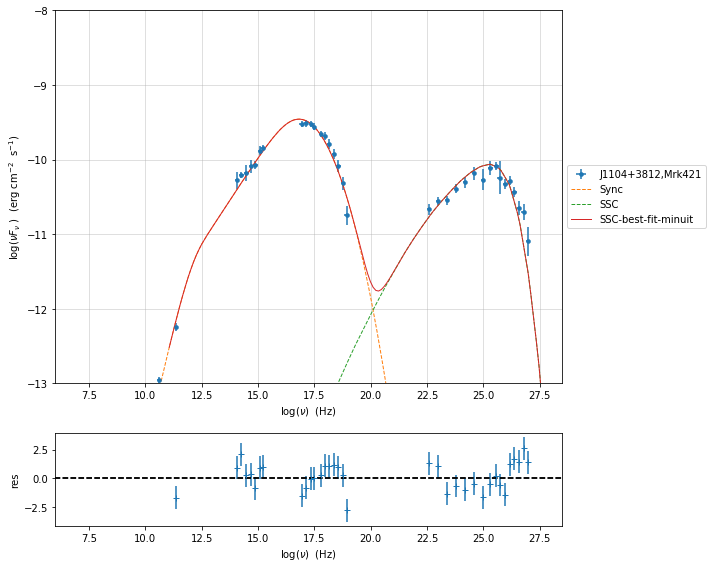

In [15]:
%matplotlib inline
fit_model_minuit.set_nu_grid(1E6,1E30,200)
fit_model_minuit.eval()
p2=fit_model_minuit.plot_model(sed_data=sed_data)
p2.rescale(y_min=-13,x_min=6,x_max=28.5)

In [16]:
model_minimizer_minuit.minimizer.mesg

------------------------------------------------------------------
| FCN = 53.29                   |     Ncalls=774 (779 total)     |
| EDM = 0.0774 (Goal: 1E-05)    |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
-------------------------------------------------------------------------------------------
|   | Name  |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
-------------------------------------------------------------------------------------------
| 0 | par_0 | 1.550E16  | 0.032E16  |            |            |3.16228e+15|3.16228e+17|       |
| 1 | par_1 |   0.082   |   0.004   |            |            |    0    |         |       |
| 2 | par_2 |   26.51   |   0.09    |            |            |    5    |   50    |       |
| 3 | par_3 |   2.34    |   0.07    |            |            |    0    |         |       |
| 4 | par_4 |  332.303  |   0.003   |            |            |    1    |  1e+09  |       |
| 5 | par_5 |  0.948E9  |  0.000E9  |            |            |    1    |  1e+15  |       |
| 6 | par_6 |   2.075   |   0.011   |            |            |   -10   |   10    |       |
| 7 | par_7 |   1.12    |   0.05    |            |            |   -15   |   15    |       |
| 8 | par_8 |  0.370E5  |  0.012E5  |            |            |    1    |  1e+09  |       |
-------------------------------------------------------------------------------------------

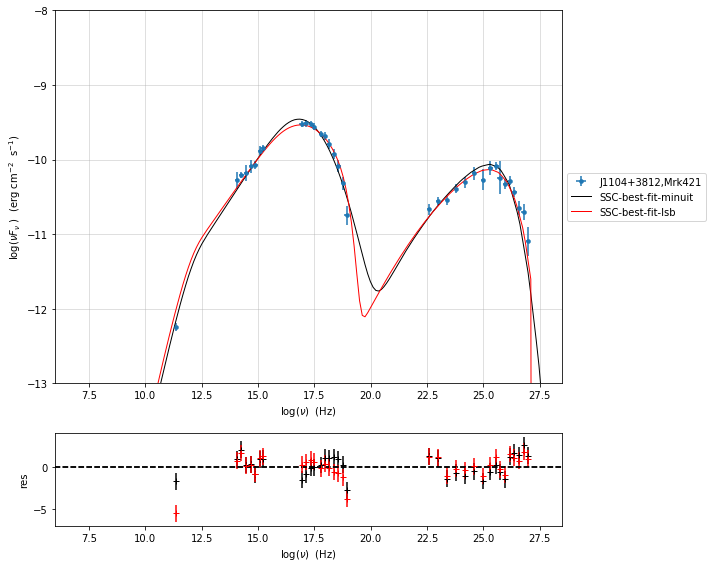

In [17]:
%matplotlib inline
from jetset.plot_sedfit import PlotSED
fit_model_minuit.set_nu_grid(1E6,1E30,200)
fit_model_minuit.eval()
p2=PlotSED()
p2.add_data_plot(sed_data,fit_range=[ 11,29])
p2.add_model_plot(fit_model_minuit,color='black')
p2.add_residual_plot(fit_model_minuit,sed_data,fit_range=[ 11,29],color='black')
p2.add_model_plot(fit_model_lsb,color='red')
p2.add_residual_plot(fit_model_lsb,sed_data,fit_range=[ 11,29],color='red')
p2.rescale(y_min=-13,x_min=6,x_max=28.5)

## MCMC sampling

In [18]:
from jetset.mcmc import McmcSampler


In [19]:
jet_lsb.set_gamma_grid_size(100)
mcmc=McmcSampler(model_minimizer_lsb)
mcmc.run_sampler(nwalkers=150,burnin=10,threads=1,steps=50)

- progress=102.000% calls=7650 accepted=6461

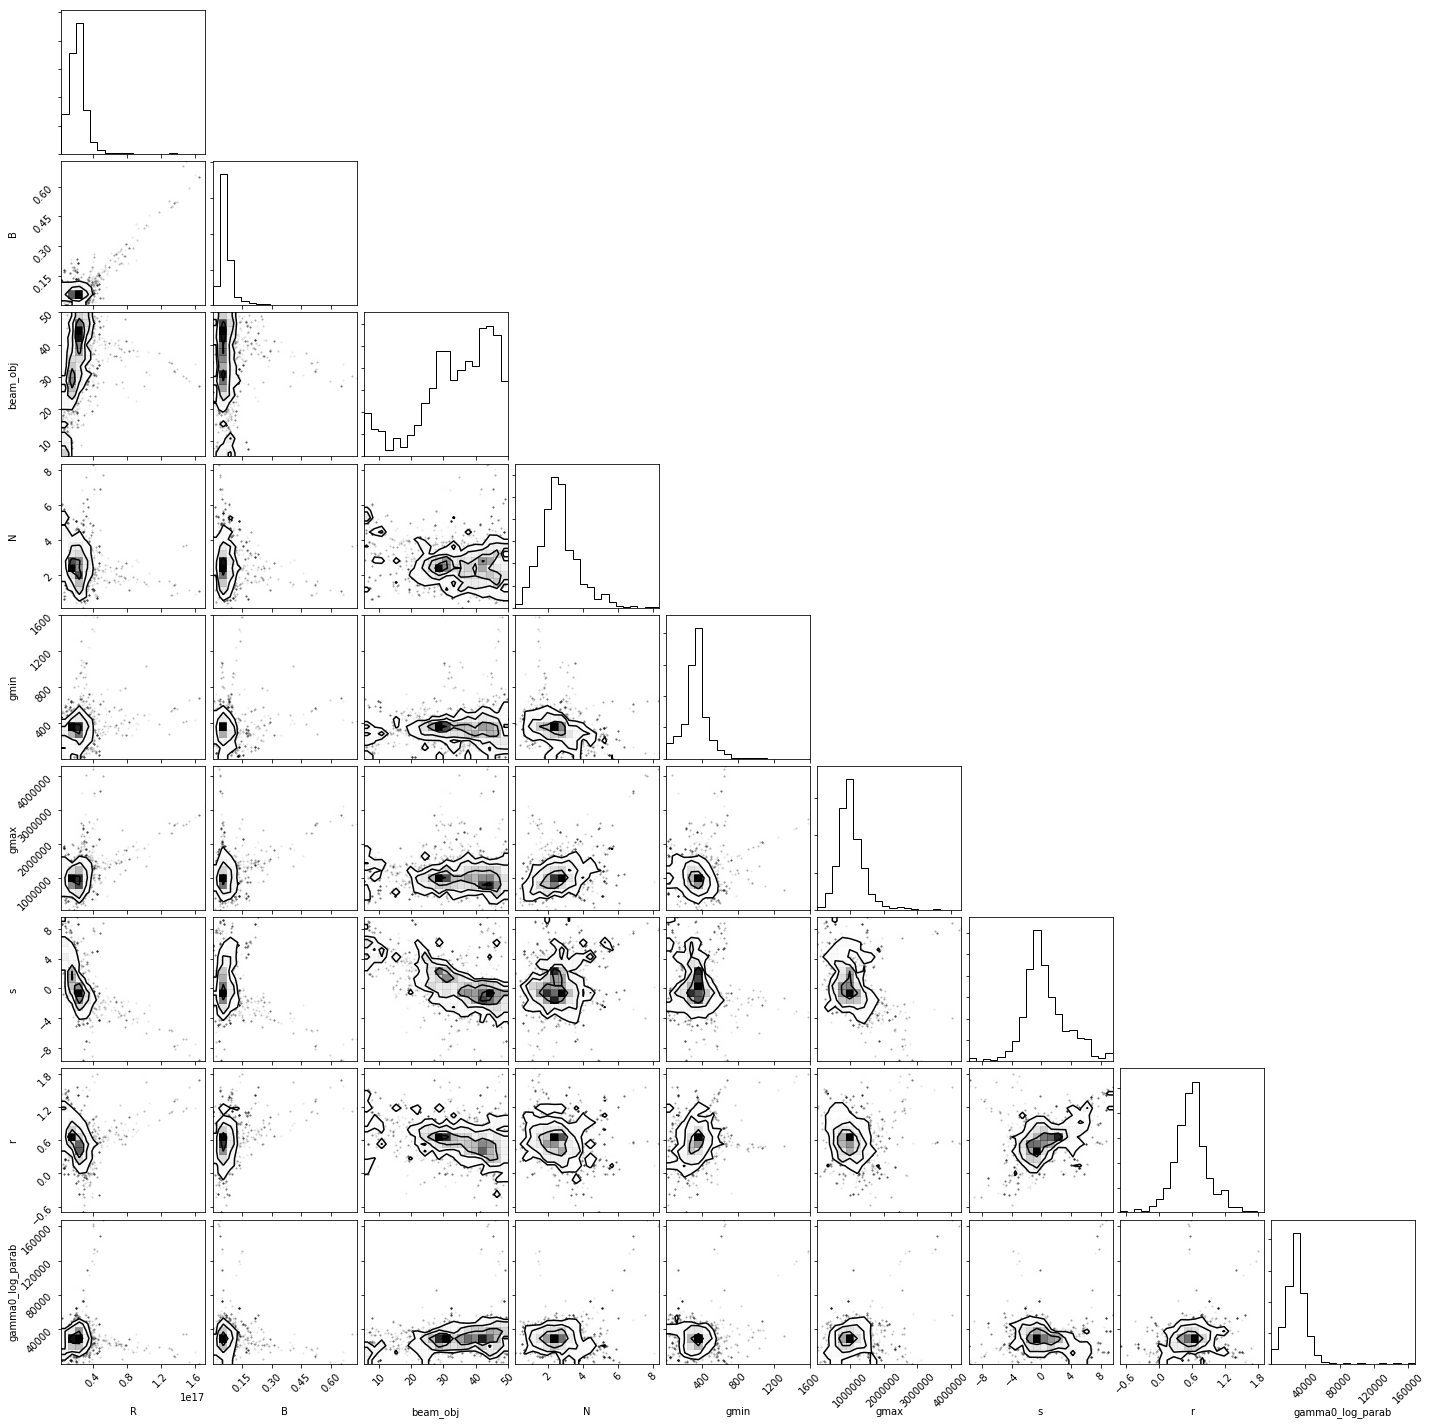

In [20]:
f=mcmc.corner_plot()

In [21]:
mcmc.sampler_out.get_par('N')

(array([2.84378306, 2.92525054, 2.44577632, ..., 3.12461893, 3.12461893,
        2.9350844 ]), 3)

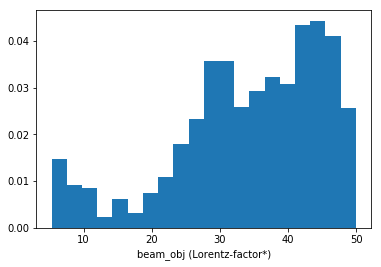

In [22]:
f=mcmc.sampler_out.plot_par('beam_obj')

In [23]:
mcmc.seve_run('test_run')

In [24]:
from jetset.mcmc import SamplerOutput
s=SamplerOutput.from_file('test_run')

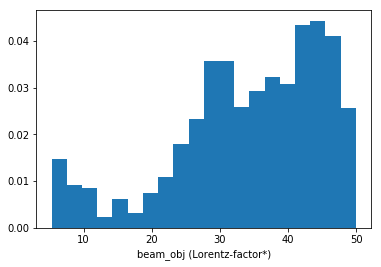

In [25]:
f=s.plot_par('beam_obj',log_plot=False)


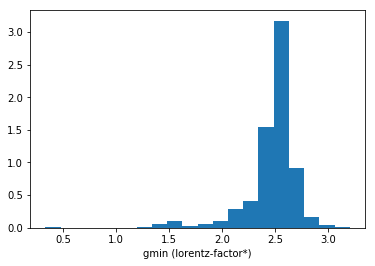

In [26]:
f=s.plot_par('gmin',log_plot=True)


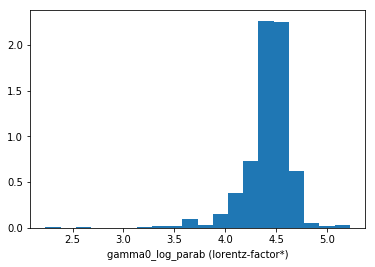

In [27]:
f=s.plot_par('gamma0_log_parab',log_plot=True)


In [28]:
jet_minuit.set_gamma_grid_size(100)
mcmc=McmcSampler(model_minimizer_minuit)
mcmc.run_sampler(nwalkers=150,burnin=10,threads=1,steps=50)

| progress=101.867% calls=7640 accepted=6246

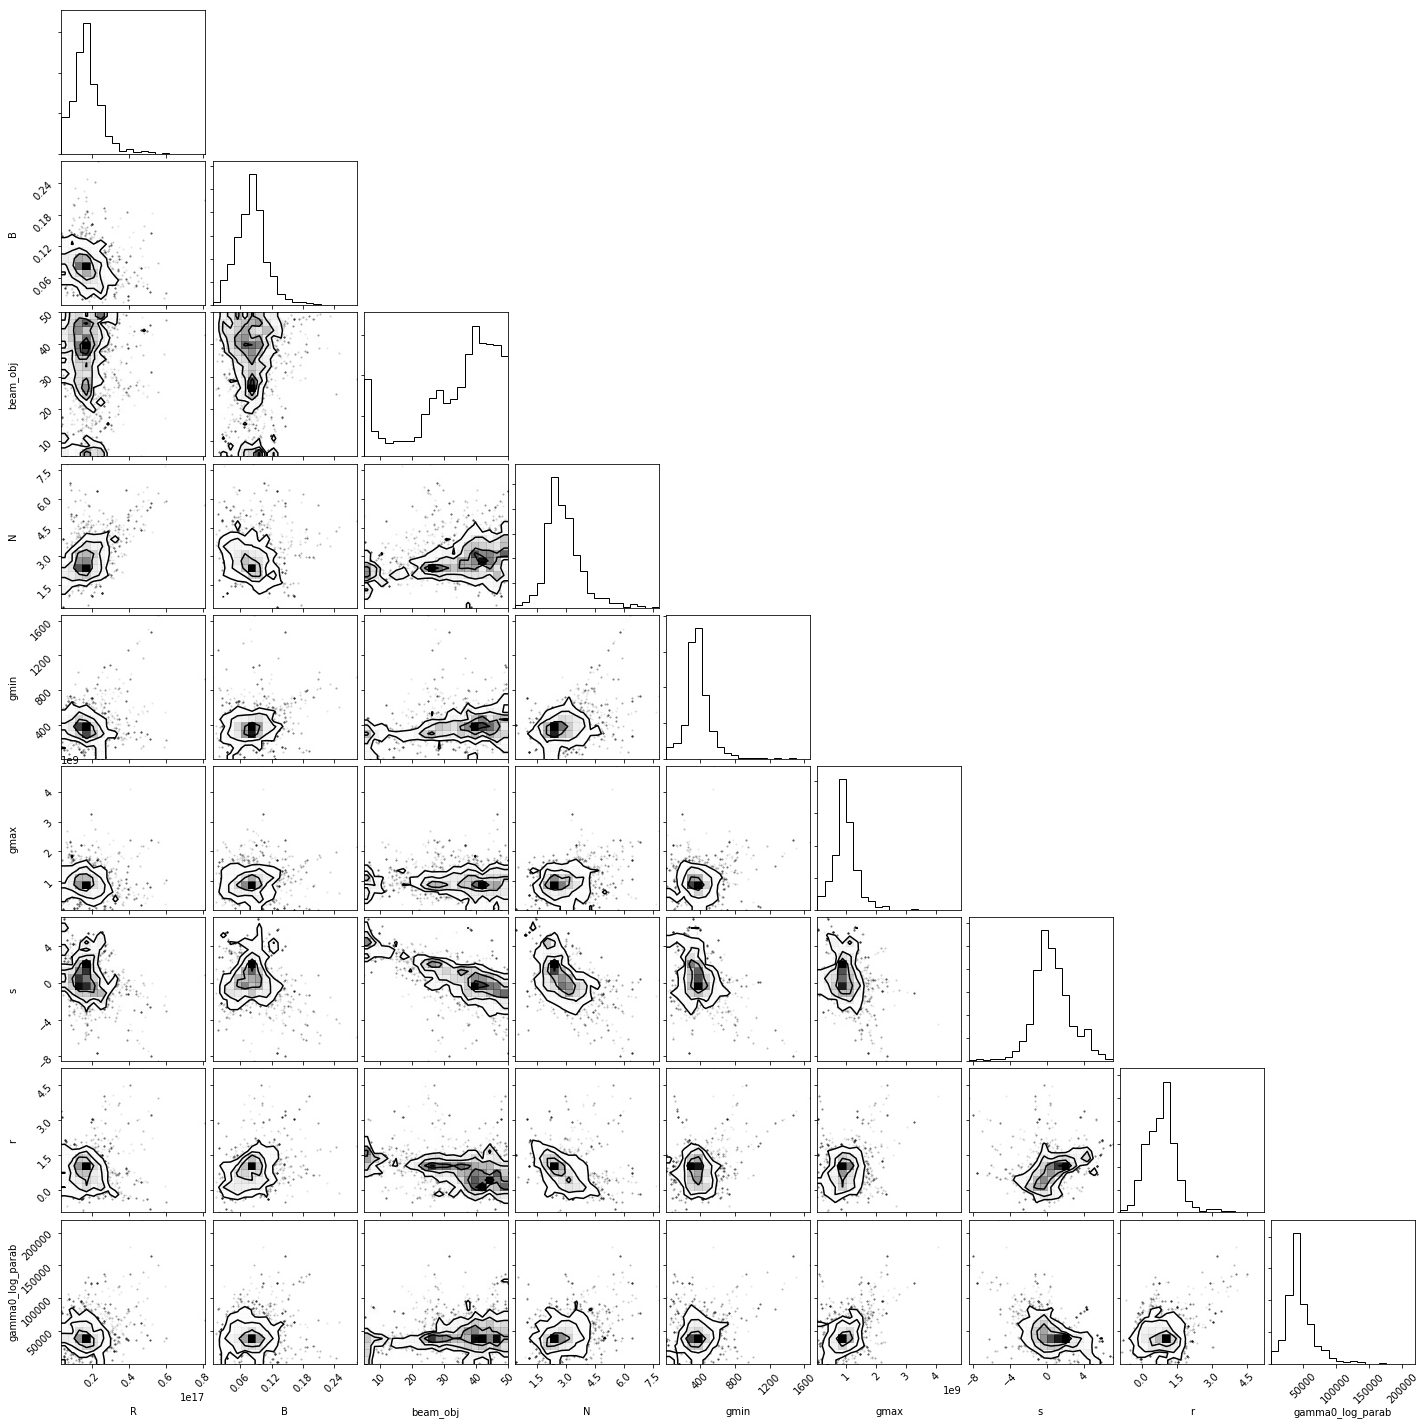

In [29]:
f=mcmc.corner_plot()

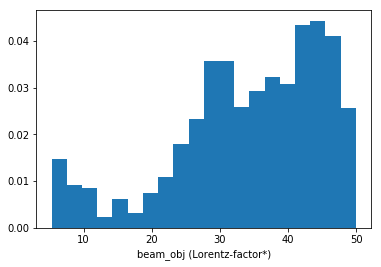

In [30]:
f=s.plot_par('beam_obj',log_plot=False)
